## Arbitrage

### Definition
<b>Simple practical case</b><br/>
Making profit by buying and selling the same thing.

<b>Generalized theoretical definition</b><br/>
Making profit by changing your portfolio one full circle along a closed directed path of portfolio change steps.

#### Question on Arbitrage
Without fees and expenses, what is the expected relative amount one can make by exchanging three currencies in a row ?

Let's denote the BTC vs USD exchange rate by $\,\mathrm{BTC}\,/\,\mathrm{USD}\,$.

With the minute-resolution exchange rate data that you downloaded plot the time series 
$\,\log A\,(\,t\,)=\displaystyle{\frac{\mathrm{ETH}\,/\,\mathrm{BTC} \cdot \mathrm{BTC}\,/\,\mathrm{USD}}{\mathrm{ETH}\,/\,\mathrm{USD}}}\,$.

1. In a perfect world what would you expect this number to be ?

2. Let's calculate and plot $\,\log A\,(\,t\,)\,$.

###### Download cryptocurrency exchange rates
1. Please go to https://www.kaggle.com/tencars/392-crypto-currency-pairs-at-minute-resolution.
2. Download into the current directory (the same directory as this .ipynb notebook file) the data files for ethbtc, btcusd and ethusd.<br/>Save these zipped files with the following names: ethbtc.csv.zip, btcusd.csv.zip and ethusd.csv.zip. 

###### Read data and Calculate A ( t )

In [1]:
import pandas as pd
import numpy as np

# --- data: reading and transformations ---
# FX (exchange rates): read three dataframes
fx = {pair: pd.read_csv(pair + '.csv.zip') for pair in ('ethbtc', 'btcusd', 'ethusd')}

# tag each data column name with the name of the currency pair
def column_name_mapping(columns, tag):
    return {col: col if col == 'time' else tag + '_' + col for col in columns}

[df.rename(columns = column_name_mapping(df.columns, pair), inplace=True) for pair, df in fx.items()]

# fxm (fx merged): merge dataframes based on the 'time' column
fxm = fx['ethbtc'].merge(fx['btcusd'], on='time').merge(fx['ethusd'], on='time')

# arbitrage opportunity testing
log_A = np.log( fxm['ethbtc_close'] * fxm['btcusd_close'] / fxm['ethusd_close'] )

###### Plot A ( t )

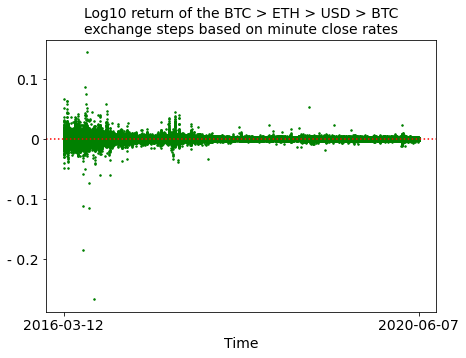

In [274]:
import matplotlib.pyplot as plt

fontsize = 14
yticks = [-0.2, -0.1 ,0, 0.1]

plt.plot(log_A, 'g.', markersize=3)
plt.title("Log10 return of the BTC > ETH > USD > BTC\nexchange steps based on minute close rates", fontsize=fontsize)
plt.xlabel('Time', fontsize=fontsize)
ax = plt.gca()
ax.set_xticks([0, len(fxm['time'])])
ax.set_xticklabels(['2016-03-12','2020-06-07'], fontsize=fontsize)
ax.set_yticks(yticks)
ax.set_yticklabels([str(_).replace('-', '- ') for _ in yticks], fontsize=fontsize)
plt.axhline(0, c='r', ls='dotted')

fig = plt.gcf()
fig.set_size_inches([7, 5])
plt.show()

## Efficient market hypothesis (EMH)
<b>Theoretical definition</b><br/>
All information is instantaneously available to everyone, and from this information everyone makes the same conclusions.<br/>Therefore, in the long time limit there is no active trading strategy that has positive expected profit above the risk-free rate.

<b>Practical definition</b><br/>
Arbitrage opportunities are removed quickly, because the market has many well-informed participants who act quite rationally.

## Modern Portfolio Theory (MPT)

The MPT is also called Markowitz Portfolio Theory after [the 1952 paper](https://www.jstor.org/stable/2975974) of Harry Markowitz.

A `portfolio` is a collection of financial assets, for example, 10 shares of stock A and 90 shares of stock B.
<br/>
In this example stock A and stock B are called the `constituent assets` of the portfolio.

For theoretical work the sum of the weights is normalized to 1. In the example, we have 0.1 stock A and 0.9 stock B.

### Outline

The MPT connects the risk of a portfolio with its expected return based on the following assumptions:

1. Market participants optimize the weights of portfolio constituents for minimal risk and maximal expected return of the portfolio.
2. For all constituents the expected returns and the covariances
  * are known and
  * they are constants, in other words, they do not change in time.
3. Portfolio risk is quantified as the yearly variance of the portfolio.

### Comments

* The MPT is a two-moment decision model. It uses the first two moments: the means and the covariance matrix.

* The variance of the $\,k$th asset is the $\,k$th number in the main diagonal of the covariance matrix.

* The `volatility` is the square root of the `variance`. The volatility is also called `standard deviation`.


* If you compare the return to the volatility instead of the variance, then the Capital Asset Line (CAL) will not be a line.

* With the MPT it is also assumed that from the expected return we can calcuate the fair price with discounting.

### Efficient Frontier

#### Tools for the mean-variance analysis

###### Linear algebra refresher

* A `tensor` is a variable with indexes:
  * a vector has one `index`, for example, the vector $\,\mathbf{w}\,$ has the index $\,i\,$ with the possible values $\,1,\,2,\,\dots,\,N\,$,
  * a matrix has two indexes, for example, the correlation matrix $\,\boldsymbol{\rho}\,$ has the indexes $\,j\,$ and $\,k\,$, both with possible values $\,1,\,2,\,\dots,\,N\,$.

* A `scalar` is a variable with _no_ indexes, for example, 
$\,f\left(\,x_{\,1},\,x_{\,2}\,\right) = x_{\,1} + x_{\,2}\,$ 
is a scalar function of the vector $\,\left(\,x_{\,1},\,x_{\,2}\,\right)\,$.


* If the $\,k$th index of tensor $\,\mathbf{a}\,$ has the possible values $\,1,\,2,\,\dots,\,N\,$, then the $\,k$th `dimension` of that tensor is $\,N\,$.

* If $\,\mathbf{a}\,$ is a vector or a matrix, then $\,\mathbf{a}^\mathrm{\,T}\,$ is the `transposition` of $\,\mathbf{a}\,$. 
  * If $\,\mathbf{a}\,$ is a row vector, then $\,\mathbf{a}^\mathrm{\,T}\,$ is a column vector.


* If the last index of tensor $\,\mathbf{a}\,$ and the first index of tensor $\,\mathbf{b}\,$ have the same dimension, then $\,\mathbf{a}\,\cdot\,\mathbf{b}\,$ is their `dot product`.
  * The dot product can be also written without the $\,\cdot\,$ sign, for example, $\,\mathbf{a}\,\mathbf{b}\,$.


* Let $\,\mathbf{1}\,$ denote the $\,N$-dimensional vector with all $\,1\,$ values: $\,\mathbf{1}=\left(\,1,\,1,\,\dots,\,1\,\right)\,$ . 

* By definition, the sum of the asset weights is $\,\mathbf{w}\,\mathbf{1}^\mathrm{\,T}=1\,$.

###### Finance terms

* Consider a `portfolio` with $\,N\,$ assets.

* The `weights` of the assets are $\,\mathbf{w}=\left(\,w_{\,1},\,w_{\,2},\,\dots,\,w_{\,N}\,\right)\,$.

* The yearly expected `returns` of the asset prices are $\,\mathbf{r}=\left(\,r_{\,1},\,r_{\,2},\,\dots,\,r_{\,N}\,\right)\,$.



* The covariance is usually calculated between the daily log returns of the asset prices, not the asset prices.

* The covariance of the $\,j$th and $\,k$th assets is $\,c_{\,j\,k}=c_{\,k\,j}\,$, and the entire `covariance matrix` is $\,\mathbf{c}\,$.

* The variance of the $\,k$th asset is $\,c_{\,k\,k}\,$.



* The `portfolio's yearly expected return` is $\,\mathbf{w}\,\mathbf{r}^\mathrm{\,T}\,$. 

* The `portfolio's variance` is $\,\sigma^\mathrm{\,2}=\mathbf{w}\,\mathbf{c}\,\mathbf{w}^\mathrm{\,T}$. This is also a yearly quantity.

###### Vector analysis refresher

* The $\,\boldsymbol{\nabla}\,$ operator is called `nabla`.

* If $\,f\left(\,\mathbf{x}\,\right)\,$ is a scalar function of the vector 
$\,\mathbf{x}=\left(\,x_{\,1},\,\dots,\,x_{\,N}\,\right)\,$, 
then $\,\boldsymbol{\nabla}\,f\,$ denotes the vector 
$\,\displaystyle{\left(\frac{\partial\,f}{\partial\,x_{\,1}},\,\dots,\,\frac{\partial\,f}{\partial\,x_{\,N}}\right)^\mathrm{T}}\,$.
    

* If $\,f\left(\,\mathbf{x}\,\right)\,$ and $\,g\left(\,\mathbf{x}\,\right)\,$ are both scalar functions of the 
vector $\,\mathbf{x}\,$,<br/>
and we are searching for the global minimum of $\,f\left(\,\mathbf{x}\,\right)\,$ with the constraint $\,g\left(\,\mathbf{x}\,\right)=0\,$,<br/>
then with a new scalar variable $\,\lambda\,$ and the scalar `Lagrange function` 
$\,\mathcal{L}\,\left(\,\mathbf{x},\,\lambda\,\right) = 
f\left(\,\mathbf{x}\,\right) - \lambda\,g\left(\,\mathbf{x}\,\right)\,$<br/>
a necessary condition for a local minimum of $\,f\left(\,\lambda\,\right)\,$ is
$\,\mathbf{0}=\,\boldsymbol{\nabla}\,\mathcal{L}\,\left(\,\mathbf{x},\,\lambda\,\right)\,$.


* Note that $\,\mathcal{L}\,$ is a function of $\,\left(\,\mathbf{x},\,\lambda\,\right)\,$, not only $\,\mathbf{x}\,$,
<br/>
therefore, $\,\boldsymbol{\nabla}\,$ differentiates with respect to the entire variable vector $\,\left(\,\mathbf{x},\,\lambda\,\right)\,$ of $\,\mathcal{L}\,$, not only $\,\mathbf{x}\,$.

#### Definition of the Efficient Frontier

###### Compact form

With fixed portfolio return minimize portfolio variance.

###### Detailed form

1. Assume that the asset returns and covariances ($\,\mathbf{r}\,$ and $\,\mathbf{c}\,$) are all known and constant.

2. Select a constant $\,q\,$ yearly expected return of the portfolio.

3. Find the non-negative asset weights $\,\mathbf{w}\,$ that minimize 
$\,\mathbf{w}\,\mathbf{c}\,\mathbf{w}^\mathrm{\,T}$ 
with the conditions
$\,\mathbf{w}\,\mathbf{1}^\mathrm{\,T}-1=0\,$ 
and $\,\mathbf{w}\,\mathbf{r}^\mathrm{\,T}-q=0\,$.

4. For all cases when a solution exists, plot the function connecting $\,q\,$ with 
$\,\mathbf{w}\,\mathbf{c}\,\mathbf{w}^\mathrm{\,T}\,$.

###### Alternative form

With fixed portfolio variance maximize portfolio return.

#### Derivation of the efficient frontier with the Lagrange method

##### Solve the equations for the necessary condition of the local minimum

###### The fine print
* Below is an analysis of the necessary condition for the global minimum.
* Generalized sufficient conditions for the local minimum are not analyzed here.
* In the particular case below, there is one local minimum, so it is a global minimum as well.

###### Solve the equations

Following the detailed definition of the Efficient Frontier, use two additional variables,
$\,\lambda_{\,\mathrm{1}}\,$ and $\,\lambda_{\,\mathrm{q}}\,$,
<br/>
and `minimize the Lagrange function` 
$\,\mathcal{L}\,\left(\,\mathbf{w},\,\lambda_{\,\mathrm{1}},\,\lambda_{\,\mathrm{q}}\,\right)
= \mathbf{w}\,\mathbf{c}\,\mathbf{w}^\mathrm{\,T} 
- \lambda_{\,\mathrm{1}}\left(\,\mathbf{w}\,\mathbf{1}^\mathrm{\,T}-1\,\right)
- \lambda_{\,\mathrm{q}}\left(\,\mathbf{w}\,\mathbf{r}^\mathrm{\,T}-q\,\right)\,$.

The necessary $\,\mathbf{0}=\,\boldsymbol{\nabla}\,\mathcal{L}\,$ 
condition for a $\,\left(\,\mathbf{w},\,\lambda_{\,\mathrm{1}},\,\lambda_{\,\mathrm{q}}\,\right)\,$ 
vector to be a local minimum location can be written in three parts:

$(1)$ $\,\,\,$ 
$
\mathbf{0} = \displaystyle{\frac{\partial\,\mathcal{L}}{\partial\,\mathbf{w}}} = 
\mathbf{c}\,\mathbf{w}^\mathrm{\,T} - 
\lambda_{\,\mathrm{1}}\,\mathbf{1}^\mathrm{\,T} - 
\lambda_{\,\mathrm{q}}\,\mathbf{r}^\mathrm{\,T} 
$

$(2)$ $\,\,\,$ 
$
0 = \displaystyle{\frac{\partial\,\mathcal{L}}{\partial\,\lambda_{\,\mathrm{1}}}} = \mathbf{w}\,\mathbf{1}^\mathrm{\,T}-1
\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,
$

$(2)$ $\,\,\,$ 
$
0 = \displaystyle{\frac{\partial\,\mathcal{L}}{\partial\,\lambda_{\,\mathrm{q}}}} = 
\mathbf{w}\,\mathbf{r}^\mathrm{\,T}-q
\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,
$

In $\,(1)\,$, $\,(2)\,$ and $\,(3)\,$ there are $\,N+2\,$ equations and $\,N+2\,$ unknowns:
$\,\lambda_{\,\mathrm{1}}\,$, $\,\lambda_{\,\mathrm{q}}\,$, and the $\,\mathbf{w}\,$ weights.

<br/>

To solve for $\,\mathbf{w}\,$, first multiply $\,(1)\,$ with the inverse of $\,\mathbf{c}\,$ from the left:

$(4)$ $\,\,\,$  $\mathbf{w}^\mathrm{\,T} = 
\lambda_{\,\mathrm{1}}\,\,\mathbf{c}^\mathrm{\,-1}\,\mathbf{1}^\mathrm{\,T} +
\lambda_{\,\mathrm{q}}\,\,\mathbf{c}^\mathrm{\,-1}\,\mathbf{r}^\mathrm{\,T}\,$ ,

and then transpose both sides of $\,(4)\,$. 
Since $\,c\,$ is symmetric, $\,\mathbf{c}^\mathrm{\,-1}\,$ is also symmetric:

$(5)$ $\,\,\,$  $\mathbf{w} =
\lambda_{\,\mathrm{1}}\,\,\mathbf{1}\,\,\mathbf{c}^\mathrm{\,-1} +
\lambda_{\,\mathrm{q}}\,\,\mathbf{r}\,\,\mathbf{c}^\mathrm{\,-1}\,$  .

<br/>

Next, multiply $\,(5)\,$ with $\,\mathbf{1}^\mathrm{\,T}\,$ from the right and apply $\,(2)\,$ to obtain

$(6)$ $\,\,\,$ $1 = 
\lambda_{\,\mathrm{1}}
\left(\,\mathbf{1}\,\,\mathbf{c}^\mathrm{\,-1}\,\mathbf{1}^\mathrm{\,T}\,\right) +
\lambda_{\,\mathrm{q}}
\left(\,\mathbf{r}\,\,\mathbf{c}^\mathrm{\,-1}\,\mathbf{1}^\mathrm{\,T}\,\right)\,$,

and multiply $\,(5)\,$ with $\,\mathbf{r}^\mathrm{\,T}\,$ from the right and apply $\,(3)\,$ to obtain

$(7)$ $\,\,\,$ $q = 
\lambda_{\,\mathrm{1}}
\left(\,\mathbf{1}\,\,\mathbf{c}^\mathrm{\,-1}\,\mathbf{r}^\mathrm{\,T}\,\right) +
\lambda_{\,\mathrm{q}}
\left(\,\mathbf{r}\,\,\mathbf{c}^\mathrm{\,-1}\,\mathbf{r}^\mathrm{\,T}\,\right)\,$.

Since $\,\mathbf{c}^\mathrm{\,-1}\,$ is symmetric, the first coefficient on the r.h.s. of $\,(7)\,$ is $\,\mathbf{1}\,\,\mathbf{c}^\mathrm{\,-1}\,\mathbf{r}^\mathrm{\,T} =
\mathbf{r}\,\,\mathbf{c}^\mathrm{\,-1}\,\mathbf{1}^\mathrm{\,T}\,$.

<br/>

Combining $\,(6)\,$ and $\,(7)\,$ gives this more compact equation:

$(8)$ $\,\,\,$ 
$
\begin{pmatrix}
1 \\ 
q
\end{pmatrix}
=
\begin{pmatrix}
\,
\mathbf{1}\,\,\mathbf{c}^\mathrm{\,-1}\,\mathbf{1}^\mathrm{\,T}
\,\,\,\,\,\, 
\mathbf{r}\,\,\mathbf{c}^\mathrm{\,-1}\,\mathbf{1}^\mathrm{\,T}
\,
\\
\,
\mathbf{r}\,\,\mathbf{c}^\mathrm{\,-1}\,\mathbf{1}^\mathrm{\,T}
\,\,\,\,\,\,
\mathbf{r}\,\,\mathbf{c}^\mathrm{\,-1}\,\mathbf{r}^\mathrm{\,T}
\,
\end{pmatrix}
\begin{pmatrix} 
\lambda_{\,\mathrm{1}} \\
\lambda_{\,\mathrm{q}}
\end{pmatrix}
$

To simplify $\,(8)\,$, denote by $\,\mathbf{A}\,$ the matrix on the right hand side, 
and abbreviate the two vectors as
$\,\mathbf{h}=\left(\,\lambda_{\,\mathrm{1}},\,\lambda_{\,\mathrm{q}}\,\right)\,$
and $\,\mathbf{q}=\left(\,1,\,q\,\right)\,$.


With these notations, multiply $\,(8)\,$ by $\,\mathbf{A}^{\,-1}\,$ from the left:

$(9)$ $\,\,\,$ 
$\,\mathbf{A}^{\,-1}\,\mathbf{q}^\mathrm{\,T}=\mathbf{h}^\mathrm{\,T}\,$.

Since $\,\mathbf{A}\,$ is symmetric, $\,\mathbf{A}^{\,-1}\,$ is also symmetric, and $\,(9)\,$ is equivalent to

$(10)$ $\,\,\,$ 
$\,\mathbf{h}=\mathbf{q}\,\,\mathbf{A}^{\,-1}\,$.

Inserting this $\,\mathbf{h}\,$ vector back into $\,(5)\,$ gives the asset weights.

##### Portfolio variance
Multiply the right hand side of $\,(5)\,$ from the right with $\,\mathbf{c}\,$, 
and then multiply the result from the right with the r.h.s. of $\,(4)\,$.<br/>
This gives for the variance of the portfolio the following equation:

$(11)$ $\,\,\,$ $\,\mathbf{w}\,\mathbf{c}\,\mathbf{w}^\mathrm{\,T} 
=
\big(\,\lambda_{\,\mathrm{1}}\,\,\mathbf{1} + \lambda_{\,\mathrm{q}}\,\,\mathbf{r}\,\big)
\,
\big(\,\lambda_{\,\mathrm{1}}\,\,\mathbf{c}^\mathrm{\,-1}\,\mathbf{1}^\mathrm{\,T} +
\lambda_{\,\mathrm{q}}\,\,\mathbf{c}^\mathrm{\,-1}\,\mathbf{r}^\mathrm{\,T}\,\big) 
\,$.

The right hand side can be simplified, because the same $\,\mathbf{A}\,$ matrix and the same $\,\mathbf{h}\,$ vector appear here that we defined after $\,(8)\,$:

$(12)$ $\,\,\,$ $\,\mathbf{w}\,\mathbf{c}\,\mathbf{w}^\mathrm{\,T} =
\mathbf{h}\,\,\mathbf{A}\,\,\mathbf{h}^\mathrm{\,T}\,$

On the right hand side of $\,(12)\,$ inserting $\,\mathbf{h}^\mathrm{\,T}\,$ from $\,(9)\,$
and $\,\mathbf{h}\,$ from $\,(10)\,$ gives that 

$(13)$ $\,\,\,$ the `portfolio's variance` is 
$\,\,\,$ 
$\sigma^\mathrm{\,2}=\mathbf{q}\,\,\mathbf{A}^{\,-1}\,\mathbf{q}^\mathrm{\,T}\,$.

##### Expected return of the portfolio

The entries of the matrix $\,\mathbf{A}\,$ are

$(14)$ $\,\,\,$ $
A_{\,11} = \mathbf{1}\,\,\mathbf{c}^\mathrm{\,-1}\,\mathbf{1}^\mathrm{\,T}
\,\, , \,\,\,\,\,\,
A_{\,12} = A_{\,21} = \mathbf{r}\,\,\mathbf{c}^\mathrm{\,-1}\,\mathbf{1}^\mathrm{\,T}
\,\, , \,\,\,\,\,\,
A_{\,22} = \mathbf{r}\,\,\mathbf{c}^\mathrm{\,-1}\,\mathbf{r}^\mathrm{\,T}
\,\, ,
$

and the inverse of $\,\mathbf{A}\,$ is

$(15)$ $\,\,\,$ $
\mathbf{A}^{\,-1} = \displaystyle{\frac{1}{A_{\,11} A_{\,22} - \left(\,A_{\,12}\,\right)^{\,2}}}\,
\begin{pmatrix} 
A_{\,22} \,\,\,\,\, -\!A_{\,12} \\
-A_{\,12} \,\,\,\,\, A_{\,11} \\
\end{pmatrix}\,$.

<br/>

Next, recall that $\,\mathbf{q}=\left(\,1,\,q\,\right)\,$, and use the notations of $\,(14)\,$ and $\,(15)\,$.<br/>
With these the portfolio variance in $\,(13)\,$ is a second order polynomial of the expected return, $\,q\,$:

$(16)$ $\,\,\,$ $ 
\sigma^\mathrm{\,2}\left(\,q\,\right)=\displaystyle{\frac{ q^{\,2} \,A_{\,11} +
q \, \left(\,-2\, A_{\,12}\,\right) + A_{\,22}
}{A_{\,11} A_{\,22} - \left(\,A_{\,12}\,\right)^{\,2}}}\,$.

To simplify $\,(16)\,$, use the following notations: 

$(17)$ $\,\,\,$ 
$
\displaystyle{\frac{1}{K^{\,2}}=\frac{1}{A_{\,22} - \left(\,A_{\,12}\,\right)^{\,2} \, \mathit{/} \, A_{\,11}}}
\,\, , \,\,\,\,\,\,
q_{\,0}=\displaystyle{\frac{A_{\,12}}{A_{\,11}}}
\,\, , \,\,\,\,\,\,
\sigma_{\,0}^\mathrm{\,2}=\displaystyle{\frac{1}{A_{\,11}}}
\,$.

With the notations in $\,(17)\,$ the variance from $\,(16)\,$ is simplified to

$(18)$ $\,\,\,$ 
$\displaystyle{\sigma^\mathrm{\,2}\left(\,q\,\right)=\frac{1}{K^{2}}\,\left(\,q-q_{\,0}\,\right)^{\,2} + \sigma_{\,0}^\mathrm{\,2}}\,$.

<br/>

In other words, the necessary condition for having a minimal variance as a function of the selected yearly return
<br/>
is that the variance lies on a parabolic curve as a function of the yearly return.

In $\,(18)\,$ observe that the $\,q\left(\,\sigma^\mathrm{\,2}\,\right)\,$ solutions are $\,q_{\,0} \pm K\,\sqrt{\sigma^\mathrm{\,2}-\sigma_{\,0}^\mathrm{\,2}\,}\,$, and the value with the $\,+\,$ sign is always higher.

With a `fixed portfolio variance`, a `rational investor` selects the higher return, 
<br/>therefore, we keep only the higher $\,q\left(\,\sigma^\mathrm{\,2}\,\right)\,$ value:

<br/>

$(19)$ $\,\,\,$ 
the `portfolio's expected return` is $\,\,\,$ 
$q\left(\,\sigma^\mathrm{\,2}\,\right)=q_{\,0} + K\,\sqrt{\sigma^\mathrm{\,2}-\sigma^\mathrm{\,2}_{\,0}\,}\,$ $\,\,\,$ with $\,\,\,$ $\sigma^\mathrm{\,2}\ge\sigma^\mathrm{\,2}_{\,0}\,$.

#### Single stocks vs their Efficient frontier

Calculate the efficient frontier for a portfolio that contains `stocks only`, and exclude all other forms of investment.

##### Read and format a data set

1. From [this kaggle page](https://www.kaggle.com/dgawlik/nyse) download the file [prices-split-adjusted.csv](https://www.kaggle.com/dgawlik/nyse?select=prices-split-adjusted.csv) to your current directory.
2. Select a year and read data from the last business day of the previous year until the last business day of the selected year.
3. Put the daily closing values of each ticker symbol (A, AAL, AAP, AAPL, ...) into a separate column.

In [140]:
import pandas as pd
import numpy as np
FIRST_DAY = pd.Timestamp(2010, 12, 31)  # last business day of 2010
LAST_DAY = pd.Timestamp(2011, 12, 30)  # last business day of 2011

prices = pd.read_csv('prices-split-adjusted.csv')[['date', 'close', 'symbol']]
prices.date = pd.to_datetime(prices['date'])
prices = prices[(FIRST_DAY <= prices.date) & (prices.date <= LAST_DAY)]
prices = prices.pivot(index='date', columns='symbol', values='close')
prices

symbol,A,AAL,AAP,AAPL,ABC,ABT,ACN,ADBE,ADI,ADM,...,XEL,XL,XLNX,XOM,XRAY,XRX,YHOO,YUM,ZBH,ZION
date,,,,,,,,,,,,,,,,,,,,,
2010-12-31,29.635193,10.01,66.150002,46.080002,34.119999,22.987198,48.490002,30.780001,37.669998,30.080000,...,23.549999,21.820000,28.980000,73.120003,34.169998,11.52,16.629999,35.262403,53.680000,24.230000
2011-01-03,29.957081,10.65,65.500000,47.081429,34.320000,22.944016,48.590000,31.290001,37.950001,30.400000,...,23.559999,22.160000,29.420000,74.550003,35.099998,11.71,16.750000,35.291157,54.970001,25.170000
2011-01-04,29.678112,10.62,62.240002,47.327145,33.939999,23.159926,48.270000,31.510000,37.520000,30.379999,...,23.660000,22.049999,29.540001,74.900002,34.709999,11.40,16.590000,34.751977,54.240002,24.760000
2011-01-05,29.613733,11.10,62.320000,47.714287,34.459999,23.159926,48.279999,32.220001,37.599998,30.520000,...,23.520000,22.170000,29.639999,74.699997,35.040001,11.46,16.910000,34.917325,54.279999,24.900000
2011-01-06,29.670958,11.24,60.270000,47.675713,34.860001,23.111945,48.459999,32.270000,37.810001,31.690001,...,23.500000,22.160000,30.139999,75.180000,34.840000,11.46,17.059999,35.161756,52.599998,24.830000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-12-23,25.293276,5.62,70.250000,57.618572,37.419998,26.878371,52.889999,28.290001,36.209999,29.059999,...,27.200001,20.270000,32.349998,85.220001,35.630001,8.29,16.190001,42.437096,53.209999,16.330000
2011-12-27,25.214592,5.40,70.919998,58.075714,37.709999,26.979130,52.930000,28.500000,36.380001,29.040001,...,27.620001,20.170000,32.290001,85.279999,35.529999,8.16,16.090000,42.631200,53.279999,16.400000
2011-12-28,24.399142,5.19,70.260002,57.520000,36.830002,26.787210,52.860001,28.020000,35.599998,28.370001,...,27.459999,19.719999,31.969999,84.180000,34.849998,7.90,15.780000,42.401151,53.160000,16.090000


##### Returns and Covariance matrix

1. Calculate the `percent return` of each stock over the entire available time period.


2. Make the covariances independent from the returns:

  * For each stock `remove the trend` from its values.<br/>
Keep the first value and delete from each value the line connecting the first and the last value.

  * From the detrended values calculate the `covariance matrix from the daily log returns`.

In [142]:
import numpy as np

# --- percent returns ---
r = np.array([100.0 * (prices[symbol][-1] / prices[symbol][0] - 1.0) for symbol in prices.columns])

# --- detrended prices ---
prices_d = prices.copy()
for symbol in prices_d.columns:
    prices_d[symbol] -= np.linspace(0.0, prices[symbol][-1] - prices[symbol][0], len(prices[symbol]))

# --- daily log returns ---
log_ret = pd.DataFrame()
for symbol in prices_d.columns:
    log_ret.insert(len(log_ret.columns), symbol, np.log(prices_d[symbol]) - np.log(prices_d[symbol]).shift())
log_ret.dropna(axis='rows', inplace=True)

# --- covariance matrix of the daily log returns ---
N = len(prices_d.columns)  # number of constituent assets
c = np.empty((N, N))

for i_A, symbol_A in enumerate(prices_d.columns):
    for i_B, symbol_B in enumerate(prices_d.columns):
        if i_A == i_B:
            c[i_A][i_A] = log_ret[symbol_A].var()
        elif i_A < i_B:
            c[i_A][i_B] = log_ret[symbol_A].cov(log_ret[symbol_B])
            c[i_B][i_A] = c[i_A][i_B]

array([[0.00077291, 0.0003324 , 0.00025124, ..., 0.00028781, 0.00033084,
        0.0004235 ],
       [0.0003324 , 0.00081487, 0.00014753, ..., 0.00019764, 0.00019522,
        0.00029147],
       [0.00025124, 0.00014753, 0.00031496, ..., 0.00014859, 0.00013127,
        0.00018672],
       ...,
       [0.00028781, 0.00019764, 0.00014859, ..., 0.00031912, 0.00017613,
        0.00021739],
       [0.00033084, 0.00019522, 0.00013127, ..., 0.00017613, 0.00033911,
        0.00026258],
       [0.0004235 , 0.00029147, 0.00018672, ..., 0.00021739, 0.00026258,
        0.00048079]])

##### Calculate and plot the Efficient Frontier

###### How to invert the covariance matrix

* The covariance matrix, $\,\mathbf{c}\,$, is a square matrix with over 400 rows (and columns) and its entries are quite random.

* Therefore, many of the eigenvalues of $\,\mathbf{c}\,$ are very close to zero, and $\,\mathbf{c}\,$ cannot be fully inverted.


* Note that $\,\mathbf{c}\,$ is a symmetric and real-valued square matrix, so it does have a full orthonormal basis of eigenvectors.<br/>
For a detailed explanation please see https://math.stackexchange.com/questions/82467.


* With these eigenvectors, rotate $\,\mathbf{c}\,$ into diagonal form, invert its significantly non-zero eigenvalues, and then rotate it back.
<br/>
This will give a close enough approximation of the inverse of $\,\mathbf{c}\,$.

###### Linear algebra refresher

* The matrix $\,\mathbf{c}\,$ is real-valued and symmetric, and it has $\,N\,$ rows (and columns).

* The $\,k$th eigenvalue and eigenvector of $\,\mathbf{c}\,$ are denoted by 
$\,\lambda_{\,k}\,$ and $\,\mathbf{e}^{\,(k)}=\left(\,e^{\,(k)}_{\,1},\,\dots,\,e^{\,(k)}_{\,N}\,\right)\,$.
* If the eigenvectors are not already orthonormal, then select them to be orthonormal.
  

* A `full orthonormal basis` of $\,\mathbf{c}\,$ is listed as a column vector of the $\,\mathbf{e}^{\,(k)}\,$  row vectors in the matrix
$\,\,\boldsymbol{\mathcal{O}}=\begin{pmatrix} — \,\mathbf{e}^{\,(1)}\,— \\ — \,\mathbf{e}^{\,(2)}\,— \\ \vdots \\  — \,\mathbf{e}^{\,(N)}\,— \end{pmatrix}\,$. 



* The `orthogonal diagonalization` of $\,\mathbf{c}\,$ is the diagonal matrix
$\,\mathbf{D}=\boldsymbol{\mathcal{O}}\,\,\mathbf{c}\,\,\boldsymbol{\mathcal{O}}^{\,\mathrm{T}}\,$. It has the $\,\lambda_{\,k}\,$ eigenvalues in the diagonal.<br/>
For a proof with visual explanation please see the first answer at https://math.stackexchange.com/questions/2938398.


* Note that $\,\boldsymbol{\mathcal{O}}^{\,\mathrm{-1}}=\boldsymbol{\mathcal{O}}^{\,\mathrm{T}}\,$,
therefore, $\,\mathbf{c}=\,\boldsymbol{\mathcal{O}}^{\,\mathrm{T}}\,\,\mathbf{D}\,\,\boldsymbol{\mathcal{O}}\,$.

###### Invert the covariance matrix and calculate the constants of the Efficient Frontier

* To avoid the zero imaginary parts of the numbers, use `eigh` instead of `eig`.

* Change the `EIGVAL_THRESHOLD`, and find out where the calculated constants converge.

In [143]:
import numpy as np
EIGVAL_THRESHOLD = 1.0e-7  # eigenvalues above this threshold are inverted, the ones below are discarded 


def approx_inverse_of_real_symmetric_matrix(input_matrix=None, eigval_threshold=None):
    """Approximate inversion of a real symmetric matrix by ignoring eigenvalues that are close to zero."""

    assert np.allclose(input_matrix, input_matrix.T), 'The input matrix has to be real symmetric'
    
    eigvals, column_eigvecs = np.linalg.eigh(input_matrix)
    eigvals_transformed = [1.0 / eigval if abs(eigval) > eigval_threshold else 0.0 for eigval in eigvals]

    return np.matmul(column_eigvecs, np.matmul(np.diag(eigvals_transformed), column_eigvecs.T))


def approx_mpt_constants(returns=None, covariance_matrix=None, eigval_threshold=None):
    """Approximate values of MPT constants based on approximate inversion of the covariance matrix."""

    assert np.allclose(covariance_matrix, covariance_matrix.T), 'The covariance matrix has to be real symmetric'
    assert len(returns) == covariance_matrix.shape[0], \
        'The length of the returns vector and the size of the covariance matrix have to be the same'
    
    c_inv_approx = approx_inverse_of_real_symmetric_matrix(input_matrix=c, eigval_threshold=eigval_threshold)

    row_vector_of_ones = np.ones(len(returns))
    A11_approx = np.matmul(row_vector_of_ones, np.matmul(c_inv_approx, row_vector_of_ones.T))
    A12_approx = np.matmul(returns, np.matmul(c_inv_approx, row_vector_of_ones.T))
    A22_approx = np.matmul(returns, np.matmul(c_inv_approx, returns.T))
    
    K_approx = np.sqrt(A22_approx - A12_approx ** 2.0 / A11_approx)
    q_0_approx = A12_approx / A11_approx
    sigma_0_sqr_approx = 1.0 / A11_approx
    
    return {'K': K_approx, 'q_0': q_0_approx, 'sigma_0_sqr': sigma_0_sqr_approx}


# --- calculate the constants of the Efficient Frontier ---
EF_const = approx_mpt_constants(returns=r, covariance_matrix=c, eigval_threshold=EIGVAL_THRESHOLD)
EF_const

{'K': 25520.541404281998,
 'q_0': -23.502465669369737,
 'sigma_0_sqr': 8.006729643153086e-06}

###### Plot the single stocks and their Efficient Frontier

<span style='background-color:yellow;color:red;font-weight:bold'>^^^ plot random linear combinations of stocks</span>

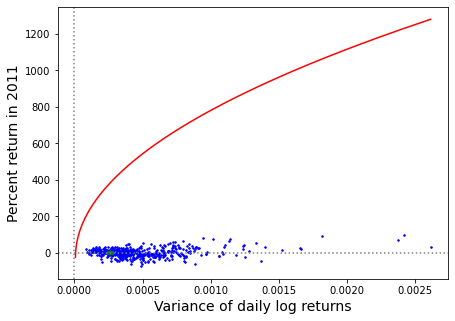

In [146]:
import matplotlib.pyplot as plt
import numpy as np

CURVE_STEP_NUM = 1000  # number of steps for plotting the Efficient Frontier numerically
K, Q_0, SIGMA_0_SQR = map(EF_const.get, ['K', 'q_0', 'sigma_0_sqr'])
N_PORTFOLIOS = 10000  # the number of random portfolios to be plotted
FONTSIZE = 14
#  XLIM = (-0.00005, 0.0006)


def efficient_frontier_function(K=None, q_0=None, sigma_0_sqr=None, sigma_sqr=None):
    """The expected return according to the MPT at the requested variance with the provided parameters"""
    
    return q_0 + K * np.sqrt(max(0.0, sigma_sqr - sigma_0_sqr))


def random_portfolios_variances_returns(asset_returns=None, covariance_matrix=None, number_of_portfolios=None):
    """Variances and returns of n random portfolios"""

    portfolio_returns = []
    portfolio_variances = []

    number_of_assets = len(asset_returns)
    for _ in range(number_of_portfolios):
        w = np.random.random(number_of_assets)
        w /= w.sum()
        portfolio_returns.append( np.matmul(w, asset_returns.T) )
        portfolio_variances.append( np.matmul(w, np.matmul(covariance_matrix, w.T)) )
    
    return portfolio_variances, portfolio_returns


stock_variances = np.diag(c)
EF_variances = np.linspace(SIGMA_0_SQR, np.amax(stock_variances), CURVE_STEP_NUM)
EF_returns = [efficient_frontier_function(K=K, q_0=Q_0, sigma_0_sqr=SIGMA_0_SQR, sigma_sqr=var) \
              for var in EF_variances]


plt.plot(stock_variances, r, c='b', marker='.', linewidth=0, markersize=3)
plt.plot(*random_portfolios_variances_returns(asset_returns=r, covariance_matrix=c, number_of_portfolios=N_PORTFOLIOS),
         c='g', marker='.', linewidth=0, markersize=3, label='Stocks')
plt.plot(EF_variances, EF_returns, 'r-', label='Efficient Frontier of Stocks, !!! K too big')

plt.ylabel('Percent return in 2011', fontsize=fontsize)
plt.xlabel('Variance of daily log returns', fontsize=fontsize)
# plt.xlim(XLIM)

plt.axhline(0, c='gray', ls='dotted')
plt.axvline(0, c='gray', ls='dotted')

fig = plt.gcf()
fig.set_size_inches([7, 5])
plt.show()

### Capital Asset Line (CAL)

<span style='background-color:yellow;color:red;font-weight:bold'>^^^ derivation, compare with data, explain result</span>

Adding a risk-free asset to the already existing $\,N\,$ assets.

Minimization problem similarly to the previous case.



## Capital Asset Pricing Model (CAPM)

* definitions
* compare to MPT

* compare to data

### Security Market Line

## Suggested Reading
* Efficient Market Hypothesis on Investopedia - https://www.investopedia.com/terms/e/efficientmarkethypothesis.asp
* Modern Portfolio Theory on Wikipedia - https://en.wikipedia.org/wiki/Modern_portfolio_theory
* OCW course - https://ocw.mit.edu/courses/mathematics/18-s096-topics-in-mathematics-with-applications-in-finance-fall-2013/